In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("./data/graduation_gender_insgesamt.csv", delimiter=";")

# drop column 'Schulform' because it does not hold any import information and has the same value in each row.
df2 = df.drop(columns='Schulform')

# replace values '-' with 0. For now, the dataframe does not show any null-values, because the dataset has '-' as null-values.
df3 = df2.replace(to_replace='-', value=0)

# change values from object to integer
df3.iloc[:, 2:38] = df3.iloc[:, 2:38].astype(int)

df = df3


/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_3092/811581788.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.iloc[:, 2:38] = df3.iloc[:, 2:38].astype(int)


In [3]:
df.head(10)

,Bundesland,Schulabschluss,09_10_m,09_10_w,09_10_ins,10_11_m,10_11_w,10_11_ins,11_12_m,11_12_w,...,17_18_ins,18_19_m,18_19_w,18_19_ins,19_20_m,19_20_w,19_20_ins,20_21_m,20_21_w,20_21_ins
0,Baden-Württemberg,Ohne Hauptschulabschluss,3798,2447,6245,3532,2390,5922,3575,2376,...,6951,3935,2346,6281,3484,2128,5612,3860,2349,6209
1,Baden-Württemberg,Hauptschulabschluss,18043,13956,31999,17413,13399,30812,13295,10009,...,17493,10401,6690,17091,10433,7016,17449,9812,6383,16195
2,Baden-Württemberg,Mittlerer Schulabschluss,25136,25014,50150,24660,24567,49227,25364,25291,...,50602,26049,24718,50767,26254,24413,50667,24771,23688,48459
3,Baden-Württemberg,Fachhochschulreife,164,149,313,136,174,310,180,200,...,350,184,204,388,196,193,389,194,194,388
4,Baden-Württemberg,Allgemeine Hochschulreife,15258,18751,34009,15835,19539,35374,27498,32040,...,33109,14405,17448,31853,13414,16129,29543,12939,15506,28445
5,Baden-Württemberg,Insgesamt,62399,60317,122716,61576,60069,121645,69912,69916,...,108505,54974,51406,106380,53781,49879,103660,51576,48120,99696
6,Bayern,Ohne Hauptschulabschluss,4700,2879,7579,4314,2669,6983,3979,2480,...,7414,4450,2524,6974,3690,2274,5964,3914,2240,6154
7,Bayern,Hauptschulabschluss,20583,14924,35507,20068,14339,34407,20181,14228,...,27883,16000,10808,26808,14617,9602,24219,13726,9191,22917
8,Bayern,Mittlerer Schulabschluss,28749,31148,59897,29078,30841,59919,29302,30971,...,60465,29189,29887,59076,27884,28862,56746,28059,28467,56526
9,Bayern,Fachhochschulreife,15,21,36,6,6,12,9,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Bundesland', 'Schulabschluss', '09_10_m', '09_10_w', '09_10_ins',
       '10_11_m', '10_11_w', '10_11_ins', '11_12_m', '11_12_w', '11_12_ins',
       '12_13_m', '12_13_w', '12_13_ins', '13_14_m', '13_14_w', '13_14_ins',
       '14_15_m', '14_15_w', '14_15_ins', '15_16_m', '15_16_w', '15_16_ins',
       '16_17_m', '16_17_w', '16_17_ins', '17_18_m', '17_18_w', '17_18_ins',
       '18_19_m', '18_19_w', '18_19_ins', '19_20_m', '19_20_w', '19_20_ins',
       '20_21_m', '20_21_w', '20_21_ins'],
      dtype='object')

## Gesamtzahlen für alle Bundesländer und alle Abschlüsse

In [5]:
# erstelle dataframe nur mit den gesamtzahlen für männlich/weiblich

df_insgesamt = df[['Bundesland', 'Schulabschluss', '09_10_ins',
       '10_11_ins', '11_12_ins',
       '12_13_ins', '13_14_ins',
       '14_15_ins', '15_16_ins',
       '16_17_ins', '17_18_ins',
       '18_19_ins', '19_20_ins',
       '20_21_ins']]

In [6]:
df_insgesamt.rename(columns={'09_10_ins': '2010','10_11_ins': '2011', '11_12_ins': '2012'
                             ,'12_13_ins': '2013','13_14_ins': '2014', '14_15_ins': '2015'
                             ,'15_16_ins': '2016','16_17_ins': '2017', '17_18_ins': '2018'
                             ,'18_19_ins': '2019','19_20_ins': '2020', '20_21_ins':'2021'}, inplace=True)

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_3092/504361566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insgesamt.rename(columns={'09_10_ins': '2010','10_11_ins': '2011', '11_12_ins': '2012'


In [ ]:
df_insgesamt.info()

In [8]:
df_insgesamt.head(10)

,Bundesland,Schulabschluss,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Baden-Württemberg,Ohne Hauptschulabschluss,6245,5922,5951,5517,5868,5768,6125,7439,6951,6281,5612,6209
1,Baden-Württemberg,Hauptschulabschluss,31999,30812,23304,23952,22673,22205,21858,17653,17493,17091,17449,16195
2,Baden-Württemberg,Mittlerer Schulabschluss,50150,49227,50655,57262,57236,57290,56130,53815,50602,50767,50667,48459
3,Baden-Württemberg,Fachhochschulreife,313,310,380,306,288,345,362,355,350,388,389,388
4,Baden-Württemberg,Allgemeine Hochschulreife,34009,35374,59538,33808,33531,35128,34631,33953,33109,31853,29543,28445
5,Baden-Württemberg,Insgesamt,122716,121645,139828,120845,119596,120736,119106,113215,108505,106380,103660,99696
6,Bayern,Ohne Hauptschulabschluss,7579,6983,6459,5992,5892,6259,7033,7496,7414,6974,5964,6154
7,Bayern,Hauptschulabschluss,35507,34407,34409,31137,30311,29156,28729,26859,27883,26808,24219,22917
8,Bayern,Mittlerer Schulabschluss,59897,59919,60273,62331,62845,62158,65405,62651,60465,59076,56746,56526
9,Bayern,Fachhochschulreife,36,12,13,6,5,7,4,0,0,0,0,0


## Abitur nach Bundesländern

In [11]:
# Abitur nach BL

bw_abitur = df_insgesamt.iloc[4,2:14]
bay_abitur = df_insgesamt.iloc[10, 2:14]
ber_abitur = df_insgesamt.iloc[16, 2:14]
bra_abitur = df_insgesamt.iloc[22, 2:14]
bre_abitur = df_insgesamt.iloc[28, 2:14]
hh_abitur = df_insgesamt.iloc[34, 2:14]
he_abitur = df_insgesamt.iloc[40, 2:14]
mvp_abitur = df_insgesamt.iloc[46, 2:14]
ni_abitur = df_insgesamt.iloc[52, 2:14]
nrw_abitur = df_insgesamt.iloc[58, 2:14]
rp_abitur = df_insgesamt.iloc[64, 2:14]
saar_abitur = df_insgesamt.iloc[70, 2:14]
sachs_abitur = df_insgesamt.iloc[76, 2:14]
sachs_an_abitur = df_insgesamt.iloc[82, 2:14]
sh_abitur = df_insgesamt.iloc[88, 2:14]
thue_abitur = df_insgesamt.iloc[94, 2:14]

### 1. Versuch

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_3092/1366069255.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(h_pad=8)


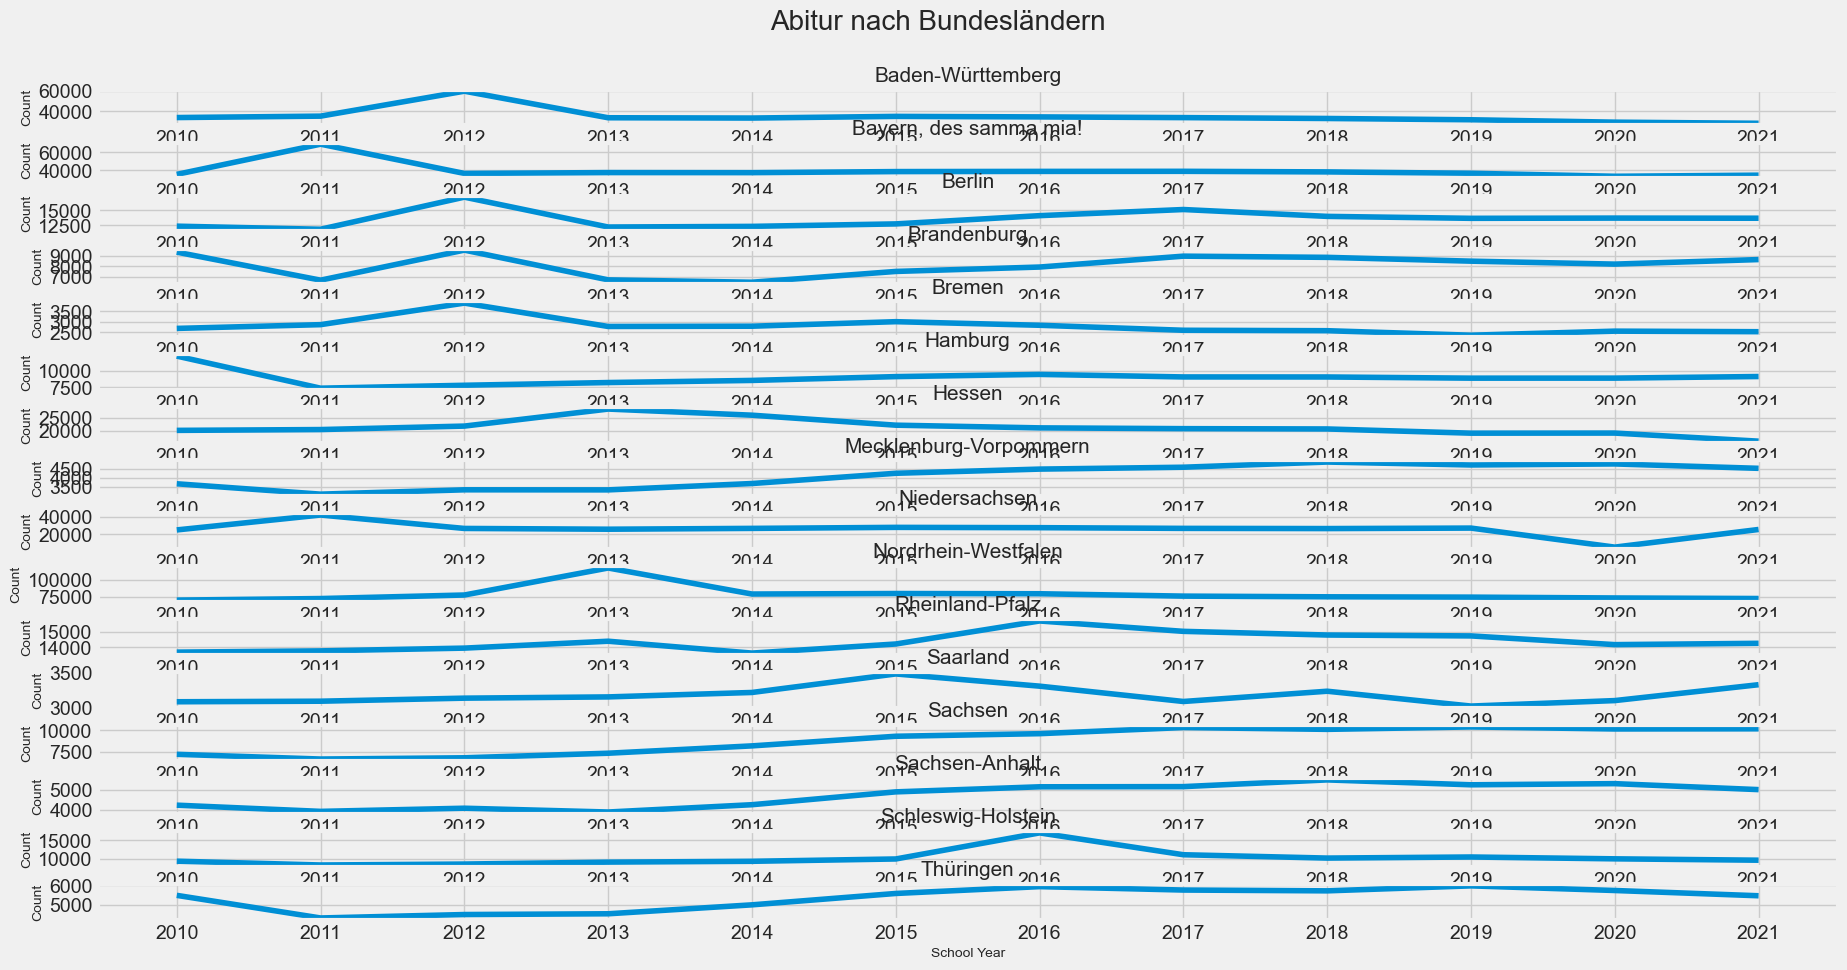

In [19]:
fig, ax = plt.subplots(16,1, figsize=(20,10))
plt.suptitle('Abitur nach Bundesländern', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.lineplot(data=bw_abitur, ax=ax[0])
f1.set_ylabel("Count", fontsize = 10)
f1.set_xlabel("School Year", fontsize = 10)
# f1.set_xticks([0,1,2,3,4,5,6])
# f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Baden-Württemberg", fontsize = 15);

f2 = sns.lineplot(data=bay_abitur, ax=ax[1])
f2.set_ylabel("Count", fontsize = 10)
f2.set_xlabel("School Year", fontsize = 10)
f2.set_title("Bayern, des samma mia!", fontsize = 15);

f3 = sns.lineplot(data=ber_abitur, ax=ax[2])
f3.set_ylabel("Count", fontsize = 10)
f3.set_xlabel("School Year", fontsize = 10)
f3.set_title("Berlin", fontsize = 15);

f4 = sns.lineplot(data=bra_abitur, ax=ax[3])
f4.set_ylabel("Count", fontsize = 10)
f4.set_xlabel("School Year", fontsize = 10)
f4.set_title("Brandenburg", fontsize = 15);

f5 = sns.lineplot(data=bre_abitur, ax=ax[4])
f5.set_ylabel("Count", fontsize = 10)
f5.set_xlabel("School Year", fontsize = 10)
f5.set_title("Bremen", fontsize = 15);

f6 = sns.lineplot(data=hh_abitur, ax=ax[5])
f6.set_ylabel("Count", fontsize = 10)
f6.set_xlabel("School Year", fontsize = 10)
f6.set_title("Hamburg", fontsize = 15);

f7 = sns.lineplot(data=he_abitur, ax=ax[6])
f7.set_ylabel("Count", fontsize = 10)
f7.set_xlabel("School Year", fontsize = 10)
f7.set_title("Hessen", fontsize = 15);

f8 = sns.lineplot(data=mvp_abitur, ax=ax[7])
f8.set_ylabel("Count", fontsize = 10)
f8.set_xlabel("School Year", fontsize = 10)
f8.set_title("Mecklenburg-Vorpommern", fontsize = 15);

f9 = sns.lineplot(data=ni_abitur, ax=ax[8])
f9.set_ylabel("Count", fontsize = 10)
f9.set_xlabel("School Year", fontsize = 10)
f9.set_title("Niedersachsen", fontsize = 15);

f10 = sns.lineplot(data=nrw_abitur, ax=ax[9])
f10.set_ylabel("Count", fontsize = 10)
f10.set_xlabel("School Year", fontsize = 10)
f10.set_title("Nordrhein-Westfalen", fontsize = 15);

f11 = sns.lineplot(data=rp_abitur, ax=ax[10])
f11.set_ylabel("Count", fontsize = 10)
f11.set_xlabel("School Year", fontsize = 10)
f11.set_title("Rheinland-Pfalz", fontsize = 15);

f12 = sns.lineplot(data=saar_abitur, ax=ax[11])
f12.set_ylabel("Count", fontsize = 10)
f12.set_xlabel("School Year", fontsize = 10)
f12.set_title("Saarland", fontsize = 15);

f13 = sns.lineplot(data=sachs_abitur, ax=ax[12])
f13.set_ylabel("Count", fontsize = 10)
f13.set_xlabel("School Year", fontsize = 10)
f13.set_title("Sachsen", fontsize = 15);

f14 = sns.lineplot(data=sachs_an_abitur, ax=ax[13])
f14.set_ylabel("Count", fontsize = 10)
f14.set_xlabel("School Year", fontsize = 10)
f14.set_title("Sachsen-Anhalt", fontsize = 15);

f15 = sns.lineplot(data=sh_abitur, ax=ax[14])
f15.set_ylabel("Count", fontsize = 10)
f15.set_xlabel("School Year", fontsize = 10)
f15.set_title("Schleswig-Holstein", fontsize = 15);

f16 = sns.lineplot(data=thue_abitur, ax=ax[15])
f16.set_ylabel("Count", fontsize = 10)
f16.set_xlabel("School Year", fontsize = 10)
f16.set_title("Thüringen", fontsize = 15);

In [ ]:
# BW Abitur

# bw_abitur = df_insgesamt.iloc[4,2:14]
# plt.figure(figsize=(14, 8))
# plt.style.use('seaborn-whitegrid')
# plt.style.use('fivethirtyeight')

# plt.plot(bw_abitur)

# plt.title("Amount of Graduates")
# plt.xlabel("School Year")
# plt.ylabel('Count')
# plt.tick_params(axis='x', rotation=60)
# plt.show()

### 2. Versuch (besser)

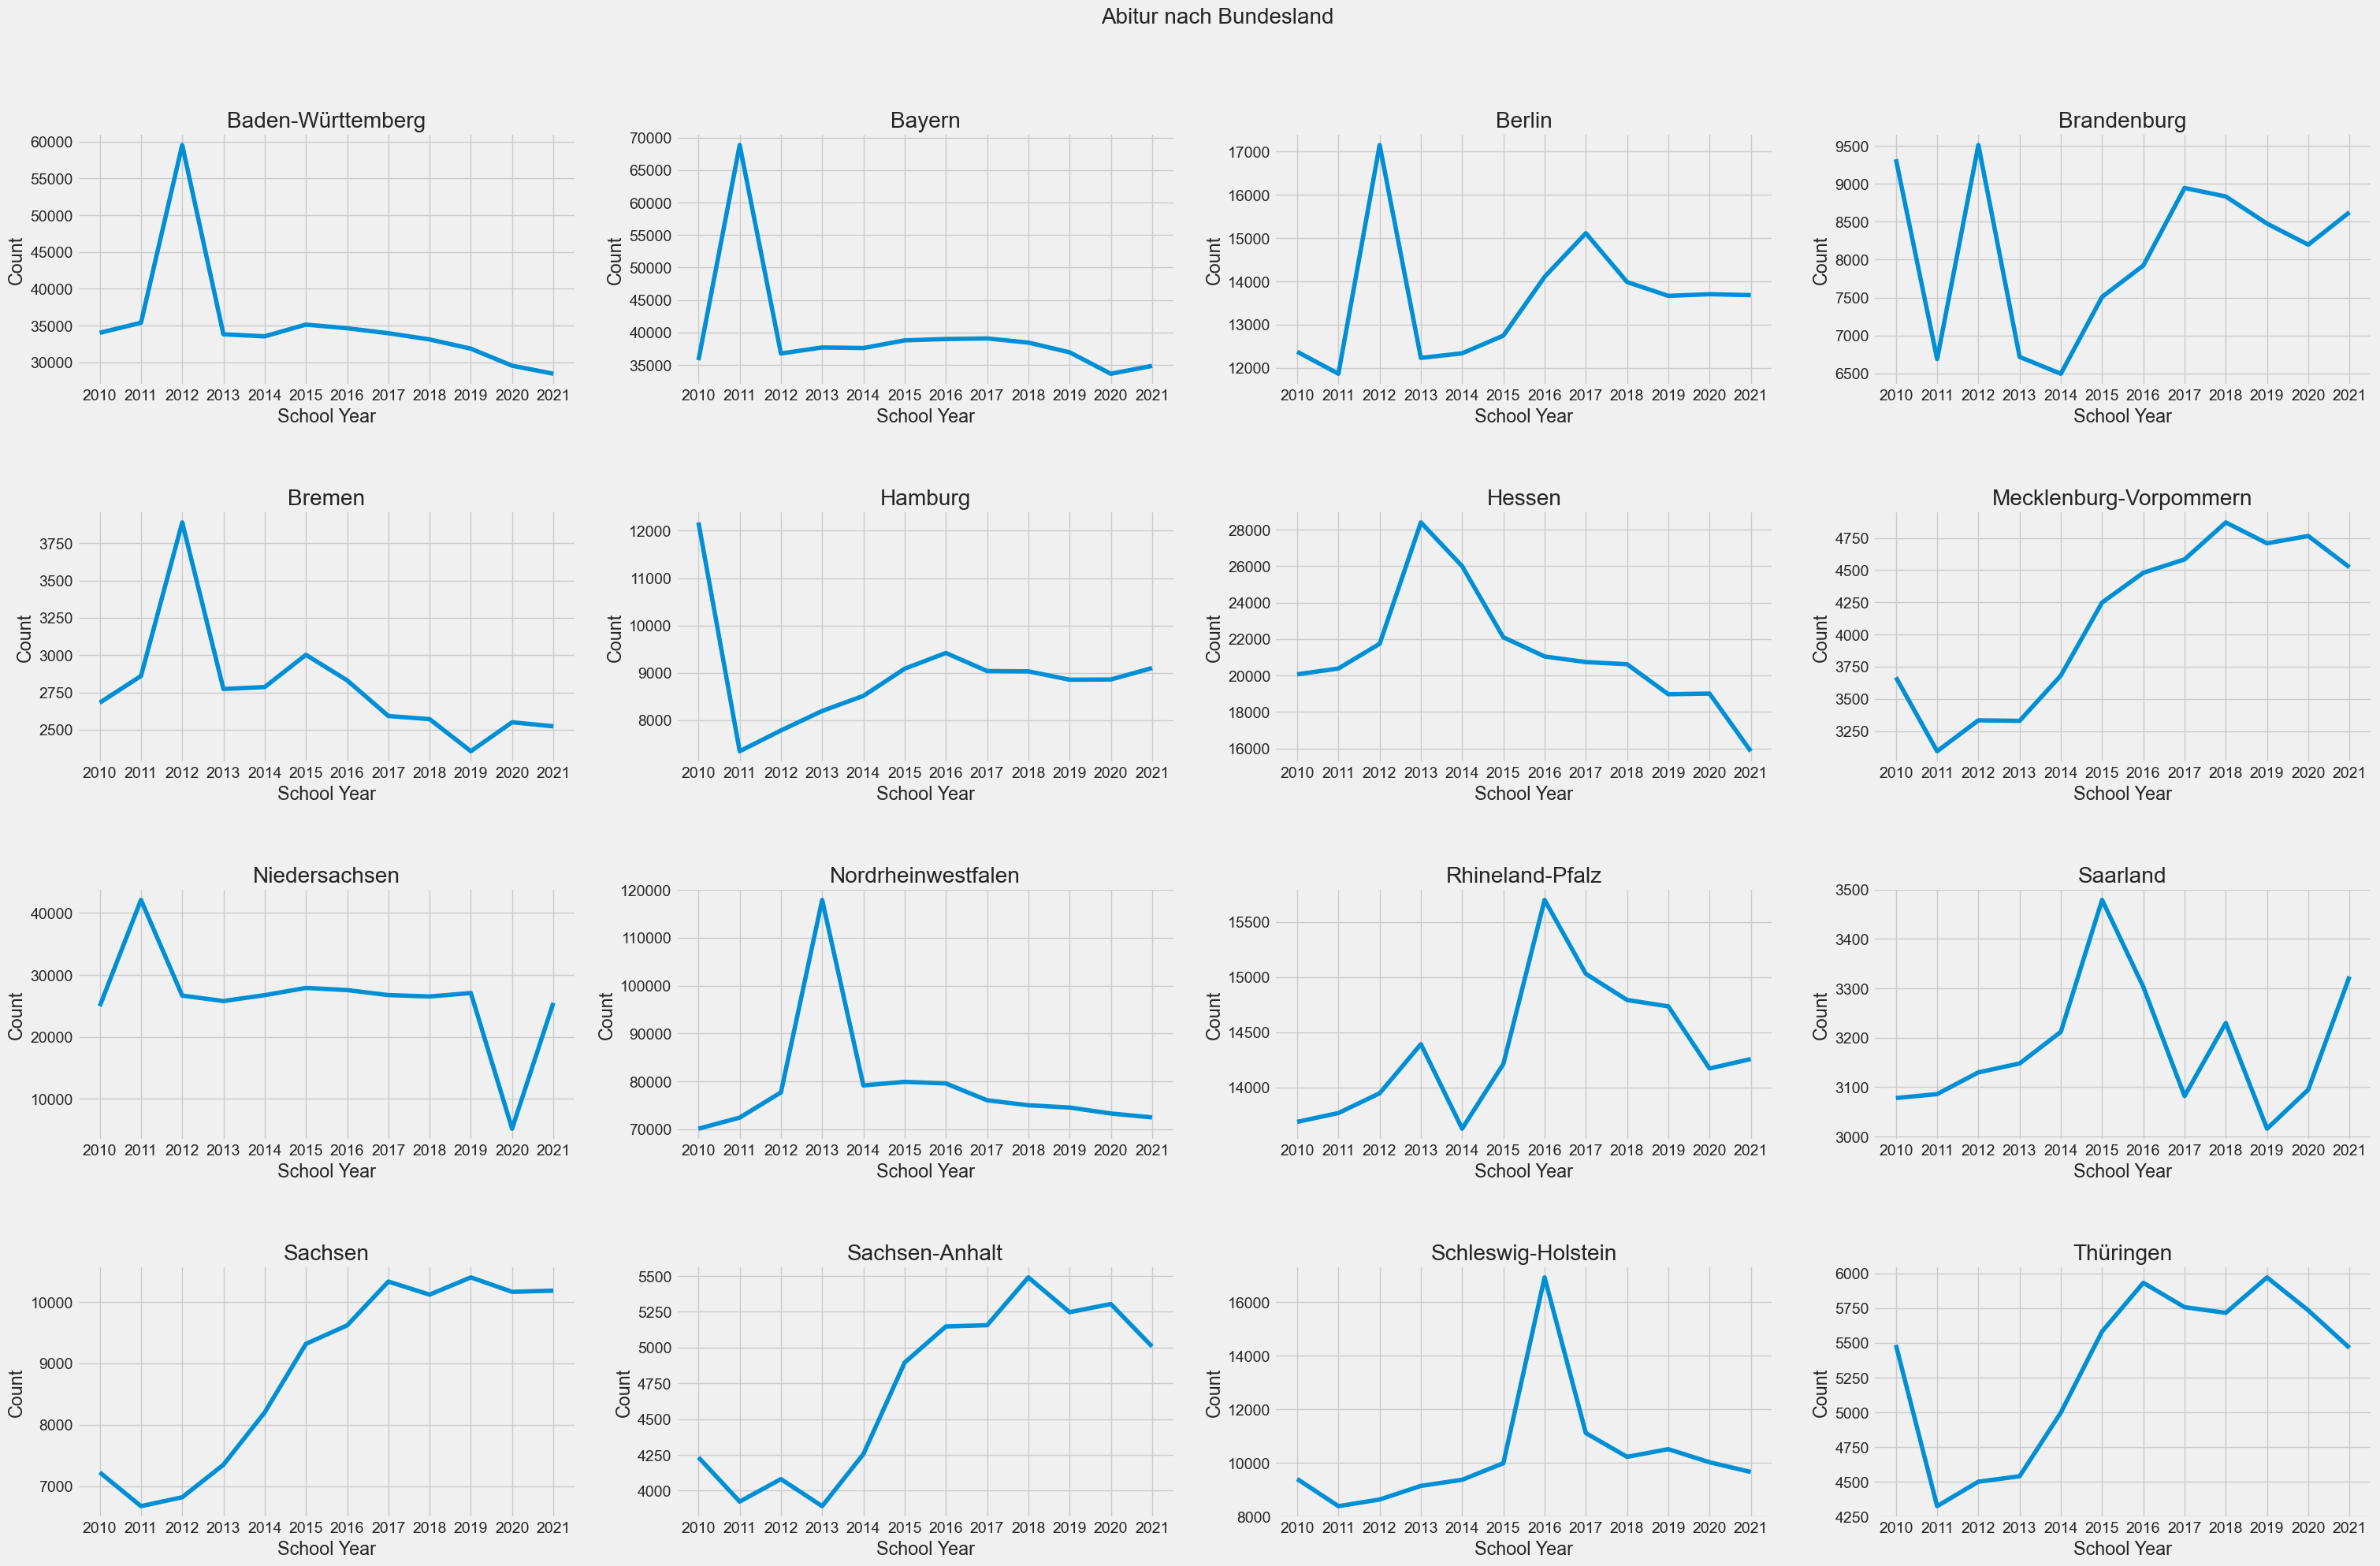

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(4, 4, figsize=(30,20)) # create subplots on 2 rows and 3 columns
plt.suptitle('Abitur nach Bundesland', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

datasets = [    {"state": "Baden-Württemberg", "data": bw_abitur},    
                {"state": "Bayern", "data": bay_abitur},    
                {"state": "Berlin", "data": ber_abitur},    
                {"state": "Brandenburg", "data": bra_abitur},    
                {"state": "Bremen", "data": bre_abitur},    
                {"state": "Hamburg", "data": hh_abitur},    
                {"state": "Hessen", "data": he_abitur},    
                {"state": "Mecklenburg-Vorpommern", "data": mvp_abitur},    
                {"state": "Niedersachsen", "data": ni_abitur},    
                {"state": "Nordrheinwestfalen", "data": nrw_abitur},    
                {"state": "Rhineland-Pfalz", "data": rp_abitur},    
                {"state": "Saarland", "data": saar_abitur},    
                {"state": "Sachsen", "data": sachs_abitur},    
                {"state": "Sachsen-Anhalt", "data": sachs_an_abitur},    
                {"state": "Schleswig-Holstein", "data": sh_abitur},    
                {"state": "Thüringen", "data": thue_abitur},]


for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    
    axs[row, col].plot(dataset["data"])
    axs[row, col].set_title(dataset["state"])
    axs[row, col].set_xlabel("School Year")
    axs[row, col].set_ylabel("Count")
    axs[row, col].tick_params(axis='x', rotation=0)

plt.show()

### To Do: Berechnung der Gesamtzahl (Abitur) für Deutschland

## Dropouts nach Bundesländern

In [31]:
# Dropouts nach BL

bw_dropouts = df_insgesamt.iloc[0,2:14]
bay_dropouts = df_insgesamt.iloc[6, 2:14]
ber_dropouts = df_insgesamt.iloc[12, 2:14]
bra_dropouts = df_insgesamt.iloc[18, 2:14]
bre_dropouts = df_insgesamt.iloc[24, 2:14]
hh_dropouts = df_insgesamt.iloc[30, 2:14]
he_dropouts = df_insgesamt.iloc[36, 2:14]
mvp_dropouts = df_insgesamt.iloc[42, 2:14]
ni_dropouts = df_insgesamt.iloc[48, 2:14]
nrw_dropouts = df_insgesamt.iloc[54, 2:14]
rp_dropouts = df_insgesamt.iloc[60, 2:14]
saar_dropouts = df_insgesamt.iloc[66, 2:14]
sachs_dropouts = df_insgesamt.iloc[72, 2:14]
sachs_an_dropouts = df_insgesamt.iloc[78, 2:14]
sh_dropouts = df_insgesamt.iloc[84, 2:14]
thue_dropouts = df_insgesamt.iloc[90, 2:14]

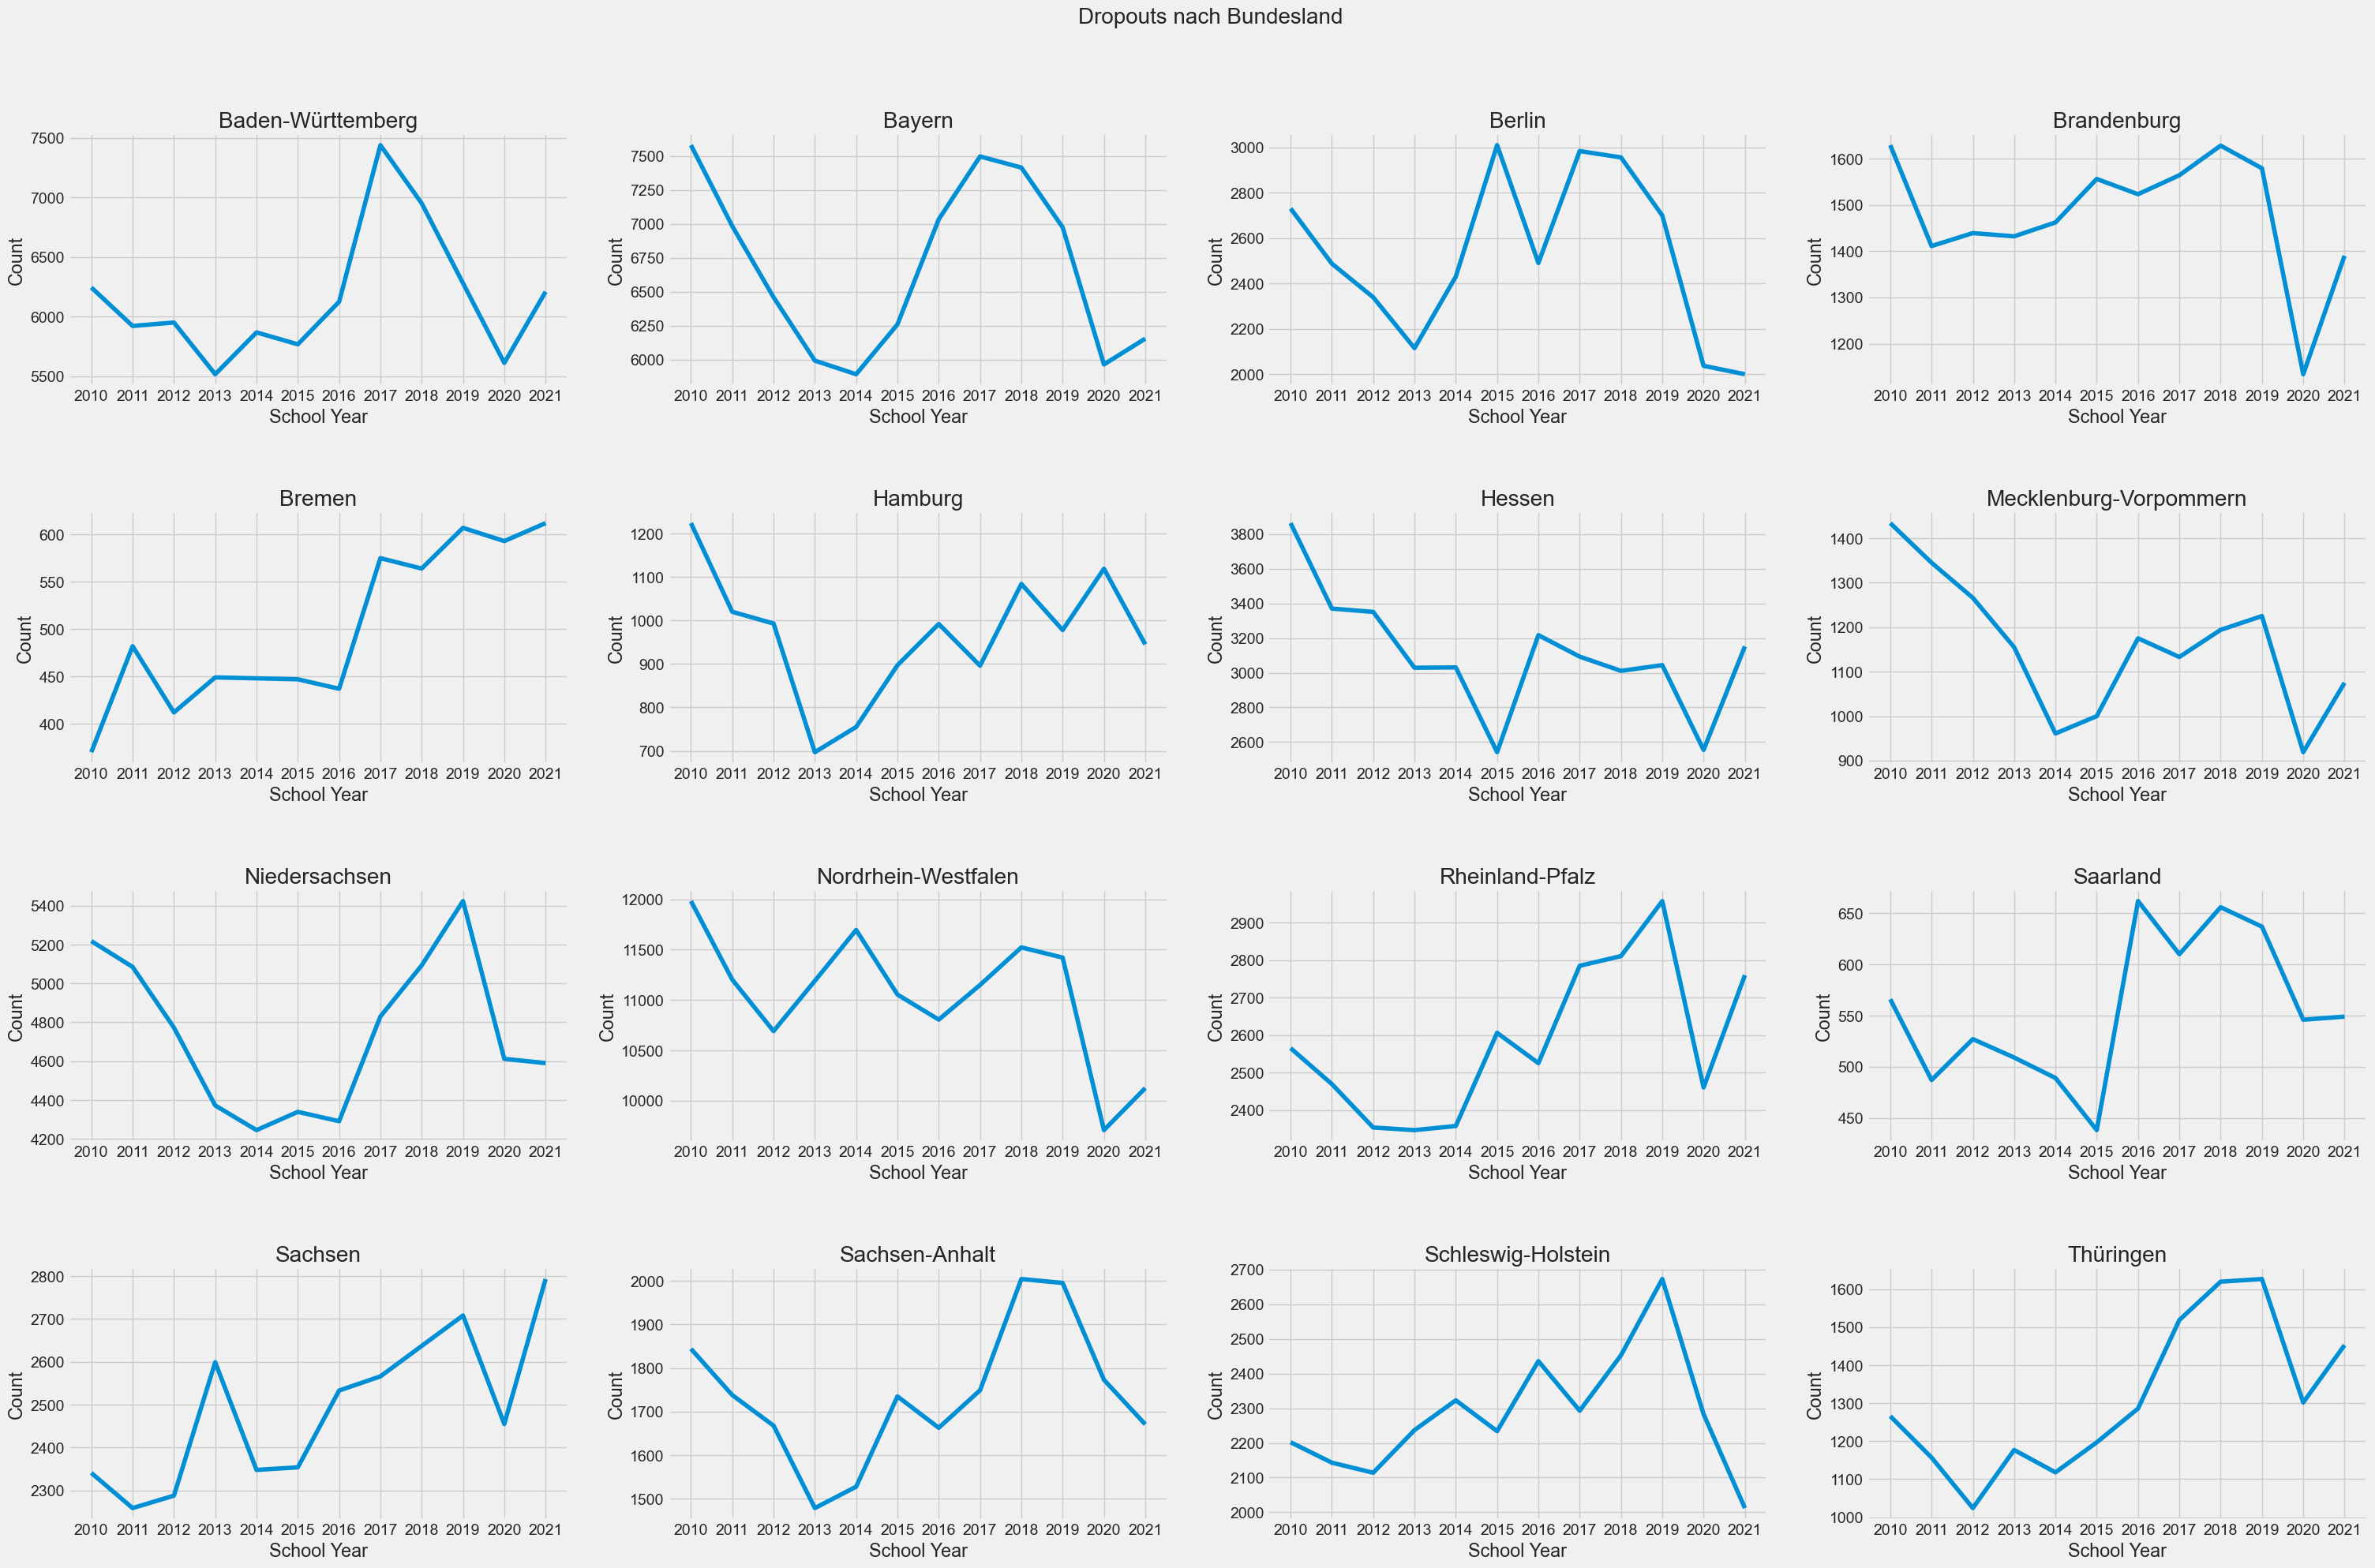

In [33]:
fig, axs = plt.subplots(4, 4, figsize=(30,20)) # create subplots on 2 rows and 3 columns
plt.suptitle('Dropouts nach Bundesland', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

datasets = [    {"state": "Baden-Württemberg", "data": bw_dropouts},    
                {"state": "Bayern", "data": bay_dropouts},    
                {"state": "Berlin", "data": ber_dropouts},    
                {"state": "Brandenburg", "data": bra_dropouts},    
                {"state": "Bremen", "data": bre_dropouts},    
                {"state": "Hamburg", "data": hh_dropouts},    
                {"state": "Hessen", "data": he_dropouts},    
                {"state": "Mecklenburg-Vorpommern", "data": mvp_dropouts},    
                {"state": "Niedersachsen", "data": ni_dropouts},    
                {"state": "Nordrhein-Westfalen", "data": nrw_dropouts},    
                {"state": "Rheinland-Pfalz", "data": rp_dropouts},    
                {"state": "Saarland", "data": saar_dropouts},    
                {"state": "Sachsen", "data": sachs_dropouts},    
                {"state": "Sachsen-Anhalt", "data": sachs_an_dropouts},    
                {"state": "Schleswig-Holstein", "data": sh_dropouts},    
                {"state": "Thüringen", "data": thue_dropouts},]


for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    
    axs[row, col].plot(dataset["data"])
    axs[row, col].set_title(dataset["state"])
    axs[row, col].set_xlabel("School Year")
    axs[row, col].set_ylabel("Count")
    axs[row, col].tick_params(axis='x', rotation=0)

plt.show()